# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import country_converter as coco
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
# api.openweathermap.org/data/2.5/box/city?bbox={bbox}&appid={API key}
# bbox required Bounding box [lon-left,lat-bottom,lon-right,lat-top,zoom]
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# minimum 500 cities
len(cities)

#Cities is a list
# cities

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# loop through cities, create list of responseL


# Lists for the dataframe
locations = []
clouds = []
humidity = []
lat = []
lon = []
max_temp = []
wind = []
country = []
dates = []
allcitydata = []

# Initial counter
counter = 0

# Did not used this - for some crazy reason - when using this format, the exception statement will not print
# url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key +"&units=imperial&q="

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        clouds.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        locations.append(response['name'])
        dates.append(response['dt'])
        allcitydata.append(response)
        counter = counter + 1
        print(f"Counter : {counter}, City : {city}")
    except Exception:
        print("weather data not available")

Counter : 1, City : sisimiut
Counter : 2, City : makakilo city
weather data not available
Counter : 3, City : banamba
weather data not available
Counter : 4, City : almaznyy
Counter : 5, City : poshekhonye
Counter : 6, City : rikitea
Counter : 7, City : moengo
Counter : 8, City : avarua
Counter : 9, City : khatanga
Counter : 10, City : ushuaia
Counter : 11, City : pervomayskiy
Counter : 12, City : luena
Counter : 13, City : bluff
Counter : 14, City : roald
Counter : 15, City : mataura
Counter : 16, City : bredasdorp
Counter : 17, City : batsfjord
Counter : 18, City : ilulissat
Counter : 19, City : ulladulla
Counter : 20, City : vilyuysk
Counter : 21, City : vaini
Counter : 22, City : adeje
Counter : 23, City : celestun
Counter : 24, City : taoudenni
Counter : 25, City : tasiilaq
Counter : 26, City : jamestown
Counter : 27, City : kruisfontein
Counter : 28, City : ostersund
Counter : 29, City : aklavik
Counter : 30, City : ponta do sol
Counter : 31, City : berlevag
Counter : 32, City : 

Counter : 244, City : touros
weather data not available
Counter : 245, City : missoula
Counter : 246, City : hvolsvollur
Counter : 247, City : rocha
Counter : 248, City : santiago
Counter : 249, City : maunabo
Counter : 250, City : alyangula
Counter : 251, City : berdigestyakh
Counter : 252, City : north bend
Counter : 253, City : shanghai
Counter : 254, City : troitsko-pechorsk
weather data not available
Counter : 255, City : isangel
Counter : 256, City : guiratinga
Counter : 257, City : saint-pierre
Counter : 258, City : sao paulo de olivenca
Counter : 259, City : bulungu
Counter : 260, City : arona
Counter : 261, City : lira
Counter : 262, City : sinnamary
Counter : 263, City : mount isa
Counter : 264, City : arnes
Counter : 265, City : polunochnoye
Counter : 266, City : huangzhou
Counter : 267, City : kristiansund
weather data not available
Counter : 268, City : mahebourg
Counter : 269, City : port-gentil
weather data not available
Counter : 270, City : bac lieu
Counter : 271, City

weather data not available
Counter : 474, City : gilbues
Counter : 475, City : constantine
Counter : 476, City : severnyy
Counter : 477, City : price
Counter : 478, City : gornozavodsk
Counter : 479, City : whitehorse
Counter : 480, City : tomatlan
Counter : 481, City : ngunguru
Counter : 482, City : dukat
weather data not available
Counter : 483, City : kieta
Counter : 484, City : oktyabrskiy
Counter : 485, City : wajir
Counter : 486, City : novikovo
Counter : 487, City : santiago de las vegas
Counter : 488, City : mosonmagyarovar
weather data not available
Counter : 489, City : atherton
Counter : 490, City : ovsyanka
Counter : 491, City : vanimo
Counter : 492, City : bafq
Counter : 493, City : yumen
Counter : 494, City : mbarara
Counter : 495, City : brae
Counter : 496, City : moree
Counter : 497, City : bathsheba
Counter : 498, City : tutoia
Counter : 499, City : guerrero negro
Counter : 500, City : charlestown
weather data not available
Counter : 501, City : pangnirtung
weather dat

In [4]:
# allcitydata
# clouds
# dates
# humidity
# lat
# lon
# max_temp
# wind
# country
# locations

In [13]:
#Convert country abbreviations to full name
full_cnames = coco.convert(names=country, to='name_short')
# full_cnames

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [47]:
# Weather data (wd) dataframe

wd_df = pd.DataFrame({"City" : locations, "Country" : full_cnames,
                     "Latitude" : lat, "Longitude" : lon,
                     "Max_temp_F" : max_temp, "Humidity_Percent" : humidity,
                     "Cloudy_Percent" : clouds, "Wind_Speed_mph" : wind,
                      "Date" : dates
                     })
wd_df

,City,Country,Latitude,Longitude,Max_temp_F,Humidity_Percent,Cloudy_Percent,Wind_Speed_mph,Date
0,Sisimiut,Greenland,66.94,-53.67,21.61,84,100,6.31,1607817321
1,Makakilo,United States,21.35,-158.09,84.20,48,20,10.29,1607817286
2,Banamba,Mali,13.55,-7.45,70.50,23,0,7.85,1607817322
3,Almaznyy,Russia,48.04,40.05,32.00,96,75,20.13,1607817322
4,Poshekhon'ye,Russia,58.50,39.14,11.50,95,17,5.68,1607817322
...,...,...,...,...,...,...,...,...,...
554,Richards,United States,46.84,-95.91,21.20,85,90,6.93,1607817418
555,Clyde,United States,41.30,-82.98,46.99,77,12,1.99,1607817419
556,Czersk,Poland,53.80,17.98,34.00,96,100,11.01,1607817419
557,Estrela,Brazil,-28.06,-50.94,63.36,94,64,4.88,1607817419


In [48]:
wd_df.dtypes

City                 object
Country              object
Latitude            float64
Longitude           float64
Max_temp_F          float64
Humidity_Percent      int64
Cloudy_Percent        int64
Wind_Speed_mph      float64
Date                  int64
dtype: object

In [49]:
wd_df['Date'] = pd.to_datetime(wd_df['Date'],unit='s').dt.strftime("%m/%d/%y")

wd_df

,City,Country,Latitude,Longitude,Max_temp_F,Humidity_Percent,Cloudy_Percent,Wind_Speed_mph,Date
0,Sisimiut,Greenland,66.94,-53.67,21.61,84,100,6.31,12/12/20
1,Makakilo,United States,21.35,-158.09,84.20,48,20,10.29,12/12/20
2,Banamba,Mali,13.55,-7.45,70.50,23,0,7.85,12/12/20
3,Almaznyy,Russia,48.04,40.05,32.00,96,75,20.13,12/12/20
4,Poshekhon'ye,Russia,58.50,39.14,11.50,95,17,5.68,12/12/20
...,...,...,...,...,...,...,...,...,...
554,Richards,United States,46.84,-95.91,21.20,85,90,6.93,12/12/20
555,Clyde,United States,41.30,-82.98,46.99,77,12,1.99,12/12/20
556,Czersk,Poland,53.80,17.98,34.00,96,100,11.01,12/12/20
557,Estrela,Brazil,-28.06,-50.94,63.36,94,64,4.88,12/12/20


In [50]:
wd_df.dtypes

City                 object
Country              object
Latitude            float64
Longitude           float64
Max_temp_F          float64
Humidity_Percent      int64
Cloudy_Percent        int64
Wind_Speed_mph      float64
Date                 object
dtype: object

In [51]:
#commenting out to keep from changes files that were sent to vacation portion
# wd_df.to_csv('../output_data/cities.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [52]:
# Humidity check

humg100 = (wd_df["Humidity_Percent"] > 100)
humg100

humg100 = humg100.to_frame('Hum>100%')

wdHumg100_df = wd_df.merge(humg100, how = "outer", left_index=True, right_index=True)
wdHumg100_df["Hum>100%"] = wdHumg100_df["Hum>100%"]*1
wdHumg100_df.head()
print(wdHumg100_df.shape)

(559, 10)


In [53]:
#  Get the cities that have humidity over 100%.
wdHumg100_df.loc[wdHumg100_df["Hum>100%"] == 1]

,City,Country,Latitude,Longitude,Max_temp_F,Humidity_Percent,Cloudy_Percent,Wind_Speed_mph,Date,Hum>100%


In [54]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = wdHumg100_df.drop(wdHumg100_df[wdHumg100_df['Hum>100%'] == 1].index, inplace = False)
print(clean_city_data.shape)

(559, 10)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

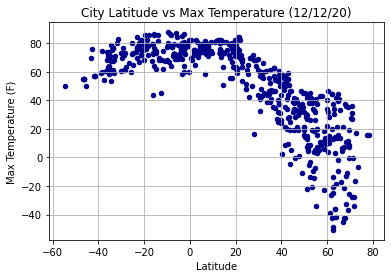

In [61]:
clean_city_data.plot.scatter(x = "Latitude", y = "Max_temp_F", c="DarkBlue")
day = wd_df.iloc[0]['Date']

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title (f"City Latitude vs Max Temperature ({day})")
plt.grid()
plt.savefig("../Images/scatterLvT.png")

## Latitude vs. Humidity Plot

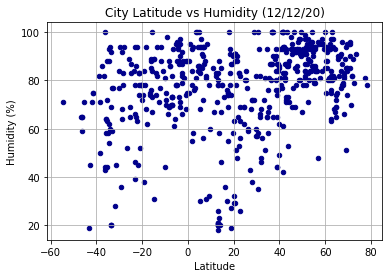

In [62]:
clean_city_data.plot.scatter(x = "Latitude", y = "Humidity_Percent", c="DarkBlue")
day = wd_df.iloc[0]['Date']

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title (f"City Latitude vs Humidity ({day})")
plt.grid()
plt.savefig("../Images/scatterLvH.png")

## Latitude vs. Cloudiness Plot

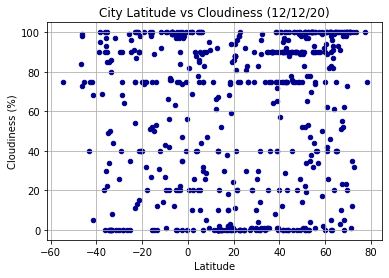

In [63]:
clean_city_data.plot.scatter(x = "Latitude", y = "Cloudy_Percent", c="DarkBlue")
day = wd_df.iloc[0]['Date']

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title (f"City Latitude vs Cloudiness ({day})")
plt.grid()
plt.savefig("../Images/scatterLvC.png")

## Latitude vs. Wind Speed Plot

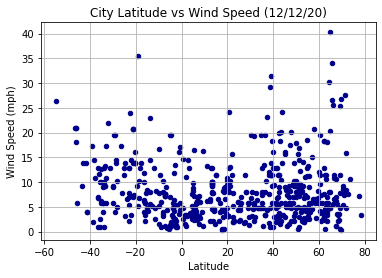

In [66]:
clean_city_data.plot.scatter(x = "Latitude", y = "Wind_Speed_mph", c="DarkBlue")
day = wd_df.iloc[0]['Date']

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title (f"City Latitude vs Wind Speed ({day})")
plt.grid()
plt.savefig("../Images/scatterLvWS.png")

## Linear Regression

In [70]:
nhclean_city_data = clean_city_data.loc[clean_city_data['Latitude'] >= 0]
shclean_city_data = clean_city_data.loc[clean_city_data['Latitude'] < 0]
# shclean_city_data
print(shclean_city_data.shape)
print(nhclean_city_data.shape)
print(clean_city_data.shape)

(162, 10)
(397, 10)
(559, 10)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

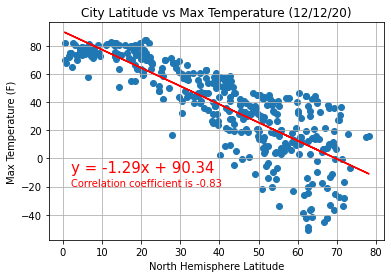

In [73]:
x_values = nhclean_city_data['Latitude']
y_values = nhclean_city_data['Max_temp_F']
day = wd_df.iloc[0]['Date']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("North Hemisphere Latitude")
plt.ylabel("Max Temperature (F)")
plt.title (f"City Latitude vs Max Temperature ({day})")

plt.annotate(line_eq,(2, -10),fontsize=15,color="red")
plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(2,-20),fontsize=10,color="red")

plt.grid()

plt.savefig("../Images/scatternhLvTlr.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

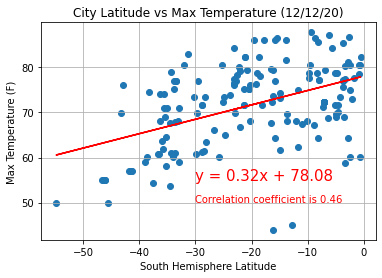

In [75]:
x_values = shclean_city_data['Latitude']
y_values = shclean_city_data['Max_temp_F']
day = wd_df.iloc[0]['Date']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("South Hemisphere Latitude")
plt.ylabel("Max Temperature (F)")
plt.title (f"City Latitude vs Max Temperature ({day})")

plt.annotate(line_eq,(-30,55),fontsize=15,color="red")
plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(-30,50),fontsize=10,color="red")

plt.grid()

plt.savefig("../Images/scattershLvTlr.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

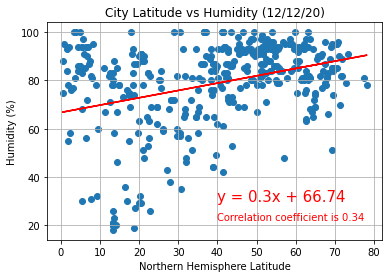

In [78]:
x_values = nhclean_city_data['Latitude']
y_values = nhclean_city_data['Humidity_Percent']
day = wd_df.iloc[0]['Date']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Humidity (%)")
plt.title (f"City Latitude vs Humidity ({day})")

plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(40,22),fontsize=10,color="red")

plt.grid()

plt.savefig("../Images/scatternhLvHlr.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

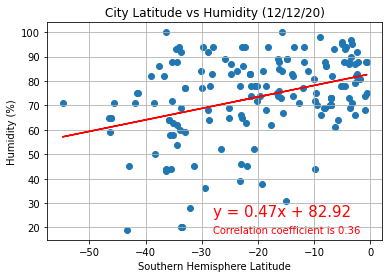

In [84]:
x_values = shclean_city_data['Latitude']
y_values = shclean_city_data['Humidity_Percent']
day = wd_df.iloc[0]['Date']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Humidity (%)")
plt.title (f"City Latitude vs Humidity ({day})")

plt.annotate(line_eq,(-28, 24.5),fontsize=15,color="red")
plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(-28,17.5),fontsize=10,color="red")

plt.grid()

plt.savefig("../Images/scattershLvHlr.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

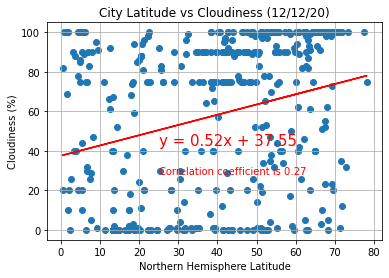

In [92]:
x_values = nhclean_city_data['Latitude']
y_values = nhclean_city_data['Cloudy_Percent']
day = wd_df.iloc[0]['Date']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Cloudiness (%)")
plt.title (f"City Latitude vs Cloudiness ({day})")

plt.annotate(line_eq,(25, 43),fontsize=15,color="red")
plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(25,28),fontsize=10,color="red")

plt.grid()

plt.savefig("../Images/scatternhLvClr.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

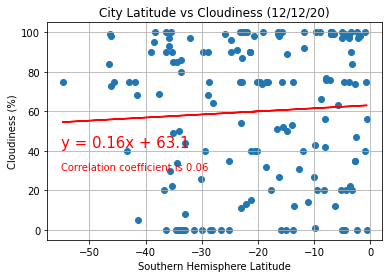

In [98]:
x_values = shclean_city_data['Latitude']
y_values = shclean_city_data['Cloudy_Percent']
day = wd_df.iloc[0]['Date']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Cloudiness (%)")
plt.title (f"City Latitude vs Cloudiness ({day})")

plt.annotate(line_eq,(-55, 42),fontsize=15,color="red")
plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(-55,30),fontsize=10,color="red")

plt.grid()

plt.savefig("../Images/scattershLvClr.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

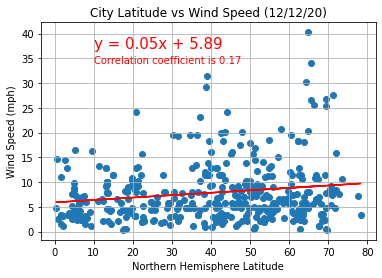

In [103]:
x_values = nhclean_city_data['Latitude']
y_values = nhclean_city_data['Wind_Speed_mph']
day = wd_df.iloc[0]['Date']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Northern Hemisphere Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title (f"City Latitude vs Wind Speed ({day})")

plt.annotate(line_eq,(10, 37),fontsize=15,color="red")
plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(10,34),fontsize=10,color="red")

plt.grid()

plt.savefig("../Images/scatternhLvWSlr.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

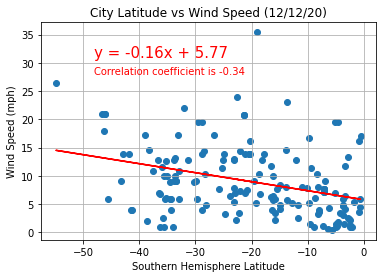

In [106]:
x_values = shclean_city_data['Latitude']
y_values = shclean_city_data['Wind_Speed_mph']
day = wd_df.iloc[0]['Date']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Southern Hemisphere Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title (f"City Latitude vs Wind Speed ({day})")

plt.annotate(line_eq,(-48,31),fontsize=15,color="red")
plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(-48,28),fontsize=10,color="red")

plt.grid()

plt.savefig("../Images/scattershLvWSlr.png")
plt.show()